## Import Library

In [13]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn import tree

## Import Game of Thronse dataset

In [2]:
drug_path = '/Users/Asus/Desktop/Unity Game/python/Data_Analysis/Machine_Learning_Python'

df = pd.read_csv(os.path.join(drug_path, 'HW2.csv'))
df.head()

,S.No,plod,name,title,gender,culture,dateOfBirth,DateoFdeath,mother,father,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,0.507,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0.924,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


## Feature sets

In [3]:
df.columns

Index(['S.No', 'plod', 'name', 'title', 'gender', 'culture', 'dateOfBirth',
       'DateoFdeath', 'mother', 'father', 'heir', 'house', 'spouse', 'book1',
       'book2', 'book3', 'book4', 'book5', 'isAliveMother', 'isAliveFather',
       'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age',
       'numDeadRelations', 'boolDeadRelations', 'isPopular', 'popularity',
       'isAlive'],
      dtype='object')

## First glance of dataset

In [4]:
df.describe()

,S.No,plod,gender,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.365530,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.312637,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.101000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,0.264500,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,0.608750,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.describe(include='object')

,name,title,culture,mother,father,heir,house,spouse
count,1946,938,677,21,26,23,1519,276
unique,1946,262,64,17,20,22,347,254
top,Hilmar Drumm,Ser,Northmen,Cersei Lannister,Quellon Greyjoy,Jaehaerys Targaryen,Night's Watch,Walder Frey
freq,1,384,124,2,2,2,105,7


In [6]:
# drop Series number
df = df.drop(['S.No'], axis=1)

In [7]:
df.shape

(1946, 29)

<AxesSubplot:ylabel='isAlive'>

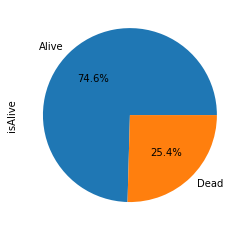

In [8]:
df.isAlive.value_counts().rename({1:'Alive', 0:'Dead'}).plot(kind='pie', autopct='%1.1f%%')

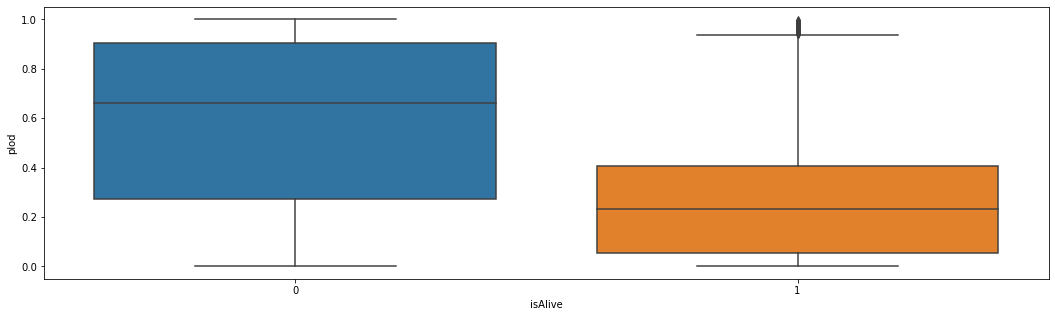

In [9]:
plt.figure(figsize=(18,5))
df.isAlive = df.isAlive.astype('object')
sns.boxplot(x=df.isAlive, y=df.plod)
plt.show()

## Seperating the Independence and Dependence variable and split into train and valid dataset

In [10]:
y = df.isAlive.astype('int64')
X = df.loc[:,df.dtypes == 'float64']

X = X.fillna(X.median())

In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

print(f'X train shape: {X_train.shape}')
print(f'X valid shape: {X_valid.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y valid shape: {y_valid.shape}')

X train shape: (1556, 9)
X valid shape: (390, 9)
y train shape: (1556,)
y valid shape: (390,)


## Decision Tree model

In [12]:
model = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3, min_samples_leaf=5)
model.fit(X_train, y_train)
pred_out = model.predict(X_valid)
acc = accuracy_score(y_valid, pred_out)
f1 = f1_score(y_valid, pred_out)

print(f'Accuracy score: {acc*100:.2f}%')
print(f'F1 score: {f1*100:.2f}%')

Accuracy score: 88.21%
F1 score: 92.46%


### Confusion matrix

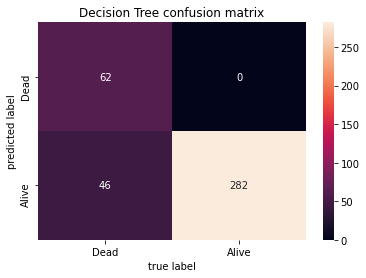

In [21]:
cm = confusion_matrix(y_valid, pred_out)
label = ['Dead', 'Alive']

sns.heatmap(cm.T, annot=True, fmt='d', xticklabels=label, yticklabels=label)
plt.title('Decision Tree confusion matrix')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()